In [42]:
from astropy.table import Table

import numpy as np
import matplotlib.pyplot as plt

from table_functions import to_array

## User input

In [98]:
# Survey mask file name
mask_filename = 'SDSSdr7/cbpdr7mask.dat'

# Galaxy file name
galaxy_filename = '/Users/kellydouglass/Documents/Research/Rotation_curves/vflag_not_found_vflag.txt'
#galaxy_filename = '/Users/kellydouglass/Documents/Research/Rotation_curves/vflag_not_classified_vflag.txt'
#galaxy_filename = '/Users/kellydouglass/Documents/Research/Rotation_curves/void_reclassification_vflag.txt'
#galaxy_filename = '/Users/kellydouglass/Documents/Research/Rotation_curves/wall_reclassification_vflag.txt'

# Void file name
void_filename = 'SDSSdr7/vollim_dr7_cbp_102709_holes.txt'

## Import data

In [99]:
# Mask
mask_table = Table.read(mask_filename, format='ascii.commented_header')

# Galaxies
galaxies_table = Table.read(galaxy_filename, format='ascii.ecsv')

# Voids
void_table = Table.read(void_filename, format='ascii.commented_header')

## Convert void coordinates

In [100]:
RtoD = 180/np.pi

r = np.linalg.norm(to_array(void_table), axis=1)
void_table['r'] = r.T
void_table['ra'] = np.arctan(void_table['y']/void_table['x'])*RtoD
void_table['dec'] = np.arcsin(void_table['z']/void_table['r'])*RtoD

# Adjust ra value as necessary
boolean = np.logical_and(void_table['y'] != 0, void_table['x'] < 0)
void_table['ra'][boolean] += 180

## Plot galaxies and mask

<Figure size 432x288 with 0 Axes>

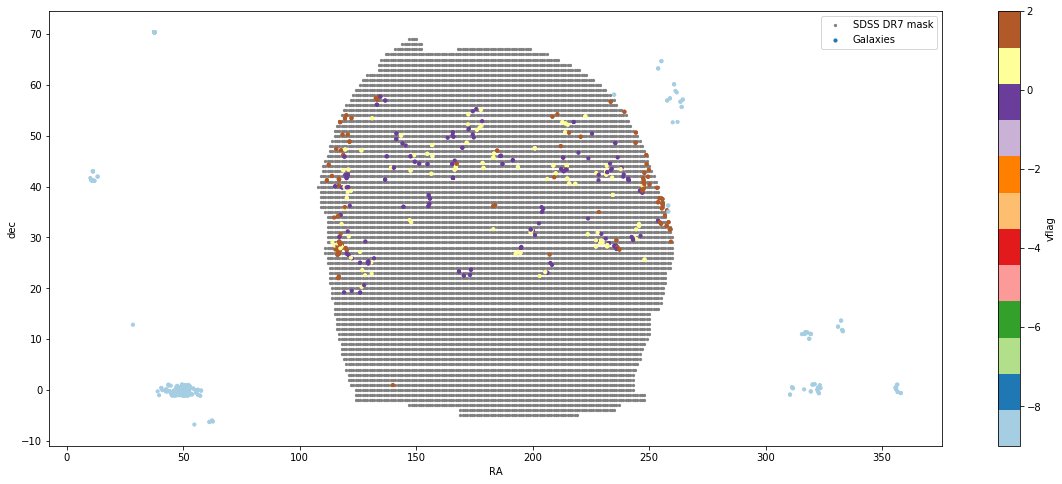

In [101]:
plt.set_cmap('Paired')

plt.figure(figsize=(20,8))
plt.scatter(mask_table['ra'], mask_table['dec'], s=5, c='grey', label='SDSS DR7 mask')
plt.scatter(galaxies_table['NSA_RA'], galaxies_table['NSA_DEC'], s=10, c=galaxies_table['vflag'], label='Galaxies')
#plt.scatter(void_table['ra'], void_table['dec'], s=5, c='mediumvioletred', label='voids')
plt.colorbar(label='vflag')
plt.legend()
plt.xlabel('RA')
plt.ylabel('dec')
plt.show()